Se importan los paquetes necesarios:

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import ADASYN

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Ubicación de los datasets:

In [2]:
data_sets = ['/content/drive/Shareddrives/TFM-JRA/data/aps_failure_training_set.csv',\
             '/content/drive/Shareddrives/TFM-JRA/data/aps_failure_test_set.csv']

# header_line = 14  # Comentarios en los archivos que deben ser omitidos

Conjunto de datos de *training*  como `DataFrame`:

In [3]:
df_train = pd.read_csv(data_sets[0],\
                       na_values = 'na',\
                       converters={'class': lambda x: True if x == 'pos' else False})

df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,False,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,False,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,False,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,False,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,False,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,1603216.0,6015982.0,1968266.0,164972.0,12560.0,4880368.0,0.0,280.0,0.0,1224.0,2114.0,8913782.0,7998174.0,1929126.0,776370.0,2.0,0.0,0.0,0.0,3328.0,1080.0,0.0,0.0,0.0,0.0,0.0,45114.0,2533260.0,...,0.0,1872932.0,4936.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62846.0,137050.0,27546.0,0.0,0.0,265640.0,54496.0,470800.0,293652.0,0.0,0.0,0.0,0.0,80125300.0,2912.04,2858.0,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,False,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,99186.0,36564.0,128.0,0.0,0.0,56982.0,0.0

Conjunto de datos de *test*  como `DataFrame`:

In [4]:
df_test = pd.read_csv(data_sets[1],\
                       na_values = 'na',\
                       converters={'class': lambda x: True if x == 'pos' else False})

df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,1846.0,0.0,0.0,0.0,3976.0,0.0,0.0,0.0,1520.0,2374.0,11516.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,1100.0,574.0,232.0,66.0,780.0,882.0,0.0,4.0,0.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,False,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,3636.0,0.0,0.0,0.0,5244.0,0.0,60.0,0.0,0.0,0.0,23174.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,3996.0,584.0,200.0,62.0,37580.0,3756.0,6368.0,36.0,0.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,False,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,452706.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,0.0,77898.0,110548.0,3605894.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,...,0.0,3613906.0,4218.0,692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25278.0,9438.0,2504.0,10262714.0,1278664.0,109700.0,19072.0,9520.0,4902.0,4434614.0,70900.0,0.0,0.0,26002880.0,2057.84,2158.0,396312.0,538136.0,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,False,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,984314.0,1680050.0,1135268.0,92606.0,14038.0,1772828.0,0.0,0.0,0.0,1116.0,2372.0,3546760.0,3053176.0,652616.0,423374.0,0.0,0.0,7274.0,0.0,1622.0,432.0,0.0,0.0,0.0,0.0,0.0,6388.0,1091104.0,...,46.0,3413978.0,2924.0,414.0,0.0,0.0,60.0,38710.0,0.0,0.0,0.0,0.0,27740.0,33354.0,6330.0,0.0,0.0,133542.0,21290.0,2718360.0,435370.0,0.0,0.0,0.0,0.0,1179900.0,1541.32,1678.0,659550.0,691580.0,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,False,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,17926.0,82834.0,3114.0,0.0,0.0,48978.0,0.0,0.0,0.0,0.0,0.0,97146.0,89920.0,12932.0,5092.0,0.0,0.0,0.0,0.0,102.0,50.0,0.0,0.0,0.0,0.0,0.0,11544.0,73570.0,...,0.0,95372.0,78.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,538.0,360.0,142.0,0.0,0.0,1822.0,344.0,2140.0,394.0,13664.0,110.0,0.0,0.0,813740.0,113.86,52.0,10216.0,9958.0,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,False,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,5486.0,704012.0,3220278.0,1297498.0,76170.0,7206.0,2276100.0,0.0,0.0,0.0,0.0,0.0,4547950.0,3779700.0,973592.0,669608.0,0.0,0.0,1536.0,0.0,6374.0,1194.0,0.0,0.0,0.0,0.0,0.0,214014.0,3876498.0,...,12.0,4521542.0,4596.0,1006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40386.0,58588.0,23628.0,0.0,0.0,155596.0,23350.0,7124860.0,724280.0,30954.0,6854.0,0.0,0.0,10074490.0,1546.74,2054.0,883900.0,983308.0,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,False,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,6444.0,3308.0,2720.0,0.0,0.0,0.0,3740.0,0.0,0.0,0.0,1150.0,2790.0,14656.0,12242.0,7222.0,1338.0,0.0,0.0,0.0,0.0,66.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3962.0,104.0,

# 1. Descriptiva de los datos

Se confirma que ambos conjuntos cuentan con las mismas columnas:

In [5]:
(df_train.columns == df_test.columns).all()

True

Filas o columnas duplicadas:

In [ ]:
# Train
print("En el conjunto de entrenamiento:")
data_out = df_train.drop_duplicates(inplace=False)  # Se eliminan las filas duplicadas
print("Número de filas duplicadas:", df_train.shape[0]-data_out.shape[0])
data_out.T.drop_duplicates().T  # Se eliminan las columnas duplicadas trasponiendo
print("Número de columnas duplicadas:", df_train.shape[1]-data_out.shape[1])

# Test
print("\nEn el conjunto de prueba:")
data_out = df_test.drop_duplicates(inplace=False)  # Se eliminan las filas duplicadas
print("Número de filas duplicadas:", df_test.shape[0]-data_out.shape[0])
data_out.T.drop_duplicates().T  # Se eliminan las columnas duplicadas trasponiendo
print("Número de columnas duplicadas:", df_test.shape[1]-data_out.shape[1])

# Otra forma
# dups = df_train[df_train.duplicated()]
# print("Número de filas duplicadas:", dups.shape[0])

En el conjunto de entrenamiento:
Número de filas duplicadas: 0
Número de columnas duplicadas: 0

En el conjunto de prueba:
Número de filas duplicadas: 0
Número de columnas duplicadas: 0


No hay ni filas ni columnas duplicadas en el conjunto de datos.

Se separa la variable *target* de los conjuntos:

In [ ]:
# Para el conjunto de train
x_train = df_train.drop('class', axis=1)
y_train = df_train['class']

print(x_train.shape, ' ', y_train.shape)

(60000, 170)   (60000,)


In [ ]:
# Para el conjunto de test
x_test = df_test.drop('class', axis=1)
y_test = df_test['class']

print(x_test.shape, ' ', y_test.shape)

(16000, 170)   (16000,)


## Análisis de clases

In [ ]:
print("Conteo del número de muestras por clase en el conjunto de entrenamiento:")
print(df_train["class"].value_counts())

print("\nConteo del número de muestras por clase en el conjunto de prueba:")
print(df_test["class"].value_counts())

Conteo del número de muestras por clase en el conjunto de entrenamiento:
False    59000
True      1000
Name: class, dtype: int64

Conteo del número de muestras por clase en el conjunto de prueba:
False    15625
True       375
Name: class, dtype: int64


In [ ]:
# Train
print('Porcentaje de muestras pertenecientes a la clase negativa (train): {}%'.format(np.round(df_train[df_train['class']==False].shape[0]*100/df_train.shape[0],3)))
print('Porcentaje de muestras pertenecientes a la clase positiva (train): {}%'.format(np.round(df_train[df_train['class']==True].shape[0]*100/df_train.shape[0],3)))

# Test
print('\nPorcentaje de muestras pertenecientes a la clase negativa (test): {}%'.format(np.round(df_test[df_test['class']==False].shape[0]*100/df_test.shape[0],3)))
print('Porcentaje de muestras pertenecientes a la clase positiva (test): {}%'.format(np.round(df_test[df_test['class']==True].shape[0]*100/df_test.shape[0],3)))

Porcentaje de muestras pertenecientes a la clase negativa (train): 98.333%
Porcentaje de muestras pertenecientes a la clase positiva (train): 1.667%

Porcentaje de muestras pertenecientes a la clase negativa (test): 97.656%
Porcentaje de muestras pertenecientes a la clase positiva (test): 2.344%


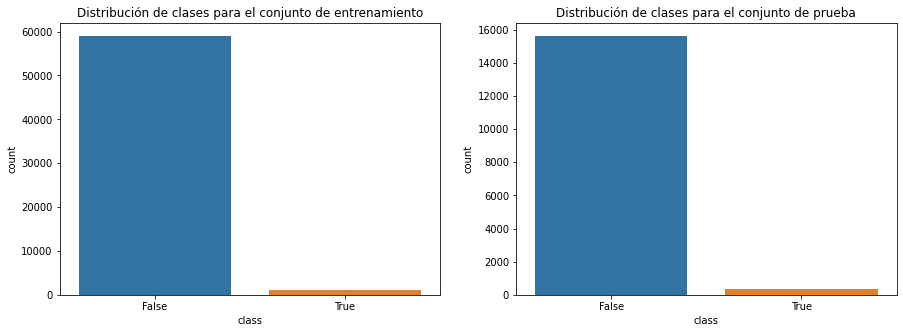

In [ ]:
# Countplot
fig, axes = plt.subplots(1, 2, figsize = (15,5))

sns.countplot(x=df_train["class"], ax=axes[0])
axes[0].set_title('Distribución de clases para el conjunto de entrenamiento')

sns.countplot(x=df_test["class"], ax=axes[1])
axes[1].set_title('Distribución de clases para el conjunto de prueba')

plt.show()

- De las 60000 observaciones que forman el conjunto de datos de entrenamiento, 59000 pertenecen a la clase negativa y solo 1000 a la clase positiva (fallo relacionado con el APS). esto es, solo un 1,67% de los datos pertenecen a la clase positiva mientras que el restante 98,33% pertenecen a la clase negativa.
- De las 16000 observaciones que forman el conjunto de datos de prueba, 15625 pertenecen a la clase negativa y solo 375 a la clase positiva; esto es, solo un 2,34% de los datos pertenecen a la clase positiva mientras que el restante 97,66% pertenecen a la clase negativa.

- Hay un importante desbalanceo de clases tanto en los datos de entrenamiento como en los de prueba.
- La cantidad de muestras pertenecientes a la clase negativa es casi 50 veces mayor que el número de muestras de la clase positiva.

## Análisis de *missings*

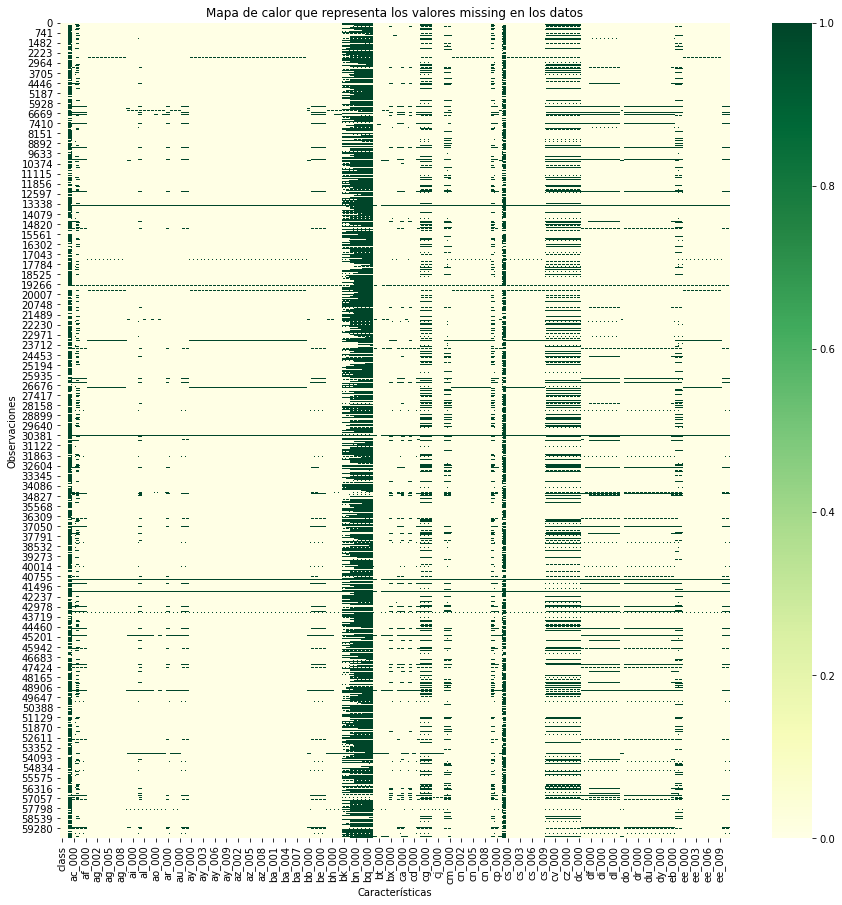

In [ ]:
# Se representa un mapa de calor utilizando los datos de entrenamiento para visualizar los valores missing
plt.figure(figsize=(15,15))
sns.heatmap(df_train.isnull(), cmap='YlGn')
plt.title("Mapa de calor que representa los valores missing en los datos")
plt.xlabel("Características")
plt.ylabel("Observaciones")
plt.show()

Mapa de calor que representa la presencia de valores *missing*:
- 0 (amarillo) para valores no *missing*
- 1 (verde) para los valores *missing*.

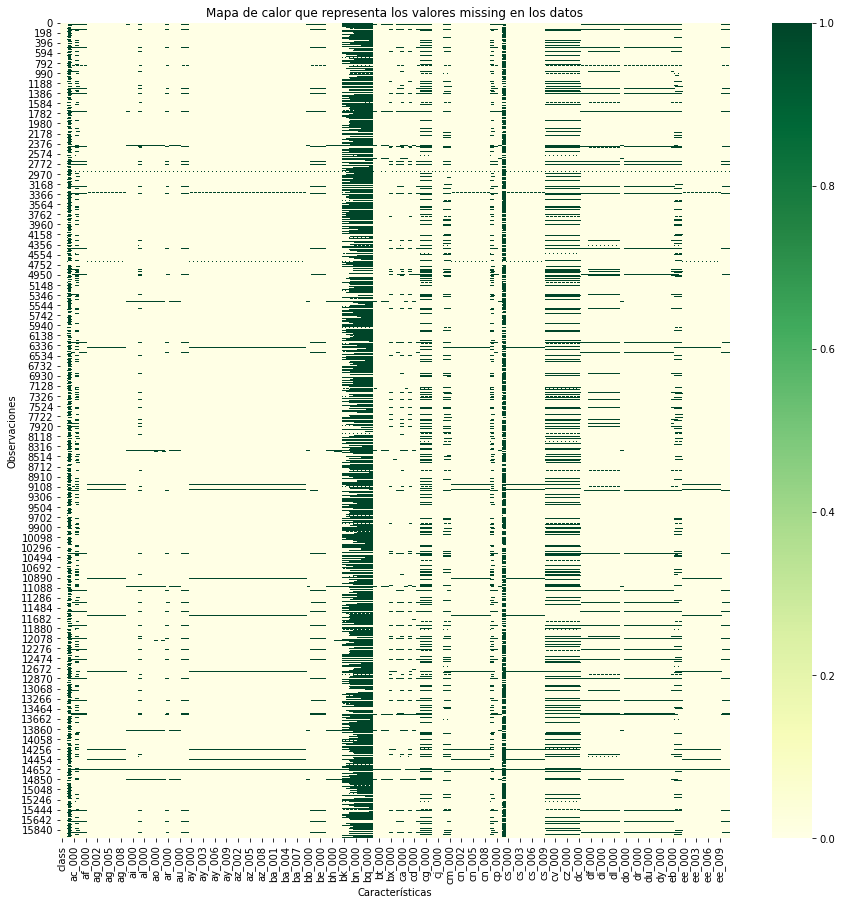

In [ ]:
# Se representa un mapa de calor utilizando los datos de prueba para visualizar los valores missing
plt.figure(figsize=(15,15))
sns.heatmap(df_test.isnull(), cmap='YlGn')
plt.title("Mapa de calor que representa los valores missing en los datos")
plt.xlabel("Características")
plt.ylabel("Observaciones")
plt.show()

Al igual que en los datos de entrenamiento, los datos de prueba también tienen muchos valores *missing*.

In [ ]:
# Comprobando el número de columnas que cuentan con valores missing
print('Número de columnas con valores missing: {}'.format(df_train.isnull().any().sum()))
print('Número de columnas sin valores missing: {}'.format(df_train.shape[1] - df_train.isnull().any().sum()))

# Comprobando el número de filas que cuentan con valores missing
print('\nNúmero de filas con valores missing: {}'.format(df_train.isnull().any(axis=1).sum()))
print('Número de filas sin valores missing: {}'.format(df_train.shape[0] - df_train.isnull().any(axis=1).sum()))

Número de columnas con valores missing: 169
Número de columnas sin valores missing: 2

Número de filas con valores missing: 59409
Número de filas sin valores missing: 591


### Análisis por filas

In [ ]:
(591/60000)*100

0.985

Menos de un 1% de las filas están completas.

Se comprueba si hay algún valor *missing* en la variable objetivo:

In [ ]:
print("Número de missings en la variable clase del conjunto de entrenamiento:", df_train["class"].isna().sum())
print("Número de missings en la variable clase del conjunto de prueba:", df_test["class"].isna().sum())

Número de missings en la variable clase del conjunto de entrenamiento: 0
Número de missings en la variable clase del conjunto de prueba: 0


In [ ]:
# Análisis de missings para el conjunto train
miss_val = pd.DataFrame(x_train.isnull().sum())
miss_val = miss_val.reset_index()
miss_val = miss_val.rename(columns = {'index': 'Predictors', 0: 'Missing_Percentage'})
miss_val['Missing_Percentage'] = (miss_val['Missing_Percentage']/len(x_train))*100
miss_val = miss_val.sort_values('Missing_Percentage', ascending = False).reset_index(drop = True)
miss_val

,Predictors,Missing_Percentage
0,br_000,82.106667
1,bq_000,81.203333
2,bp_000,79.566667
3,bo_000,77.221667
4,cr_000,77.215000
...,...,...
165,cj_000,0.563333
166,ci_000,0.563333
167,ck_000,0.563333
168,bt_000,0.278333


Sólo hay una característica que no tiene valores *missing* (*aa_000*), las demás tienen al menos un valor *missing*.

In [ ]:
# Análisis de missings para el conjunto test
miss_val = pd.DataFrame(x_test.isnull().sum())
miss_val = miss_val.reset_index()
miss_val = miss_val.rename(columns = {'index': 'Predictors', 0: 'Missing_Percentage'})
miss_val['Missing_Percentage'] = (miss_val['Missing_Percentage']/len(x_test))*100
miss_val = miss_val.sort_values('Missing_Percentage', ascending = False).reset_index(drop = True)
miss_val

,Predictors,Missing_Percentage
0,br_000,82.05625
1,bq_000,81.13125
2,bp_000,79.50625
3,bo_000,77.35000
4,ab_000,77.26875
...,...,...
165,ck_000,0.53750
166,cj_000,0.53750
167,ci_000,0.53750
168,bt_000,0.17500


Vemos que las columnas con mayor número de *missings* son las mismas para ambos conjuntos (*train* y *test*), por lo que se podrían eliminar si fuera necesario.

Veamos que ocurriría si se eliminaran los valores *missing* de los conjuntos:

In [ ]:
miss_df = df_train[df_train.isnull().any(axis=1)]
print('Número de filas con valores missing en alguna de las características:', miss_df.shape[0])
print("Porcentaje de filas que cuentan con valores missing:", (miss_df.shape[0]/df_train.shape[0])*100, '%')

Número de filas con valores missing en alguna de las características: 59409
Porcentaje de filas que cuentan con valores missing: 99.015 %


In [ ]:
df_train_na = df_train.dropna(inplace= False)
print("Después de eliminar los valores missing del conjunto de entrenamiento, \
el número de muestras se reduce de", df_train.shape[0], "a",  df_train_na.shape[0])

df_test_na = df_test.dropna(inplace= False)
print("Después de eliminar los valores missing del conjunto de prueba, \
el número de muestras se reduce de", df_test.shape[0], "a",  df_test_na.shape[0])

Después de eliminar los valores missing del conjunto de entrenamiento, el número de muestras se reduce de 60000 a 591
Después de eliminar los valores missing del conjunto de prueba, el número de muestras se reduce de 16000 a 165


¡Imposible! Quedarían muy pocos datos.

Media de missings por fila:

In [ ]:
na_count = df_train.isnull().sum(axis=1)
print('Media de valores missing por fila:', sum(na_count)/len(na_count))

Media de valores missing por fila: 14.166916666666667


Percentiles:

In [ ]:
nan_cnts = na_count.tolist()
nan_cnts.sort()
print("PERCENTILES:\n")
percentiles = np.percentile(nan_cnts, np.arange(0,110,10))
i = 0
for p in percentiles:
    print(f"El percentil número {i} es: {p}")
    i += 10

PERCENTILES:

El percentil número 0 es: 0.0
El percentil número 10 es: 6.0
El percentil número 20 es: 7.0
El percentil número 30 es: 8.0
El percentil número 40 es: 8.0
El percentil número 50 es: 8.0
El percentil número 60 es: 10.0
El percentil número 70 es: 10.0
El percentil número 80 es: 20.0
El percentil número 90 es: 24.0
El percentil número 100 es: 168.0


- De las 60000 filas, solo hay 591 sin valores *missing*, menos de un 1%. Las 59409 filas restantes cuentan con al menos un valor *missing*. Esto significa que en casi todas las observaciones hay al menos un valor *missing*.
- De media, cada fila cuenta valores missing en unas 14 columnas. Sin embargo, la mediana es 8, lo que significa que debe haber un gran número de valores missing en algunas filas. Este argumento se confirma si se observa que el percentil 100 es de 168, mientras que el percentil 90 es solo de 24.

### Análisis por columnas

In [ ]:
# Número de valores missing por columna
nan_col_cnt = {}
# Columnas
features = list(df_train.columns)
features.remove('class')

for feat in features:
  column = df_train[feat]
  # Se cuentan los missings de la columna
  try:
    nans = column.isna().sum()
  except KeyError: # Si la columna no tiene missings, se coloca un 0
    nans = 0
  nan_col_cnt[feat] = nans

no_miss = [k for k,v in nan_col_cnt.items() if v==0]
print("Número de columnas sin valores missing:", len(no_miss))
print("Característica(s) sin valores missing:", *no_miss)

Número de columnas sin valores missing: 1
Característica(s) sin valores missing: aa_000


In [ ]:
# Mínimo número de valores missing para una característica
ft_counts = list(nan_col_cnt.values())
least_missing = ft_counts[np.argsort(ft_counts)[1]]
least_missing_ft = [k for k,v in nan_col_cnt.items() if v==least_missing]
print("El menor número de valores missing para una característica es", least_missing,
      'y la característica correspondiente es:', *least_missing_ft)

# Máximo número de valores missing para una característica
most_missing = ft_counts[np.argsort(ft_counts)[-1]]
most_missing_ft = [k for k,v in nan_col_cnt.items() if v==most_missing]
print("El mayor número de valores missing para una característica es", most_missing,
      'y la característica correspondiente es:', *most_missing_ft)

El menor número de valores missing para una característica es 167 y la característica correspondiente es: bt_000
El mayor número de valores missing para una característica es 49264 y la característica correspondiente es: br_000


Media de missings por columna:

In [ ]:
mean_missing = sum(ft_counts)/len(ft_counts)
print("Media de valores missing por columna:", mean_missing)

Media de valores missing por columna: 5000.088235294118


Percentiles:

In [ ]:
print("PERCENTILES:\n")
percentiles = np.percentile(ft_counts, np.arange(0,110,10))
i = 0
for p in percentiles:
    print(f"El percentil número {i} es: {p}")
    i += 10

PERCENTILES:

El percentil número 0 es: 0.0
El percentil número 10 es: 642.0
El percentil número 20 es: 671.0
El percentil número 30 es: 671.0
El percentil número 40 es: 671.0
El percentil número 50 es: 688.0
El percentil número 60 es: 2500.0
El percentil número 70 es: 2724.3
El percentil número 80 es: 4008.0
El percentil número 90 es: 13808.0
El percentil número 100 es: 49264.0


Vamos a ver cuántas características tienen menos valores *missing* que la media y cuántas más que la media

In [ ]:
lessthan_ = [k for k,v in nan_col_cnt.items() if v<mean_missing]
morethan_ = [k for k,v in nan_col_cnt.items() if v>mean_missing]

print("Número de características con menos valores missing que la media:", len(lessthan_))
print('Número de características con más valores missing que la media', len(morethan_))

Número de características con menos valores missing que la media: 142
Número de características con más valores missing que la media 28


Solo hay 28 características con mayor número de *missings* que la media, estas son:

In [ ]:
print(*[m + ", con " + str(nan_col_cnt[m]) + " valores missing" for m in morethan_], sep='\n')

ab_000, con 46329 valores missing
ad_000, con 14861 valores missing
bk_000, con 23034 valores missing
bl_000, con 27277 valores missing
bm_000, con 39549 valores missing
bn_000, con 44009 valores missing
bo_000, con 46333 valores missing
bp_000, con 47740 valores missing
bq_000, con 48722 valores missing
br_000, con 49264 valores missing
cf_000, con 14861 valores missing
cg_000, con 14861 valores missing
ch_000, con 14861 valores missing
cl_000, con 9553 valores missing
cm_000, con 9877 valores missing
co_000, con 14861 valores missing
cr_000, con 46329 valores missing
ct_000, con 13808 valores missing
cu_000, con 13808 valores missing
cv_000, con 13808 valores missing
cx_000, con 13808 valores missing
cy_000, con 13808 valores missing
cz_000, con 13808 valores missing
da_000, con 13808 valores missing
db_000, con 13808 valores missing
dc_000, con 13808 valores missing
ec_00, con 10239 valores missing
ed_000, con 9553 valores missing


- El número mínimo de valores *missing* que se pueden encontrar en una característica es 167 para la característica *bt_000* y el mayor número de valores *missing* es 49264 para la característica *br_000*, que es la mayor parte del conjunto de datos.
- Debido a este gran valor, la media se mueve hasta unos 5000 valores *missing* para cada característica, que es casi 9 veces el valor de la mediana (688). Esto podría indicar que hay algunas características con un número excesivamente grande de valores *missing*.
- Un análisis más detallado confirma esta suposición, ya que se descubre que solo hay 28 características con mayor número de valores *missing* que la media, y la mayoría de ellas tienen al menos 9550 valores perdidos de los 60000 puntos del conjunto de datos de entrenamiento, lo que supone un gran porcentaje. Las 142 características restantes cuentan con un menor número de valores *missing* que la media.

El porcentaje de valores missing para cada característica es:

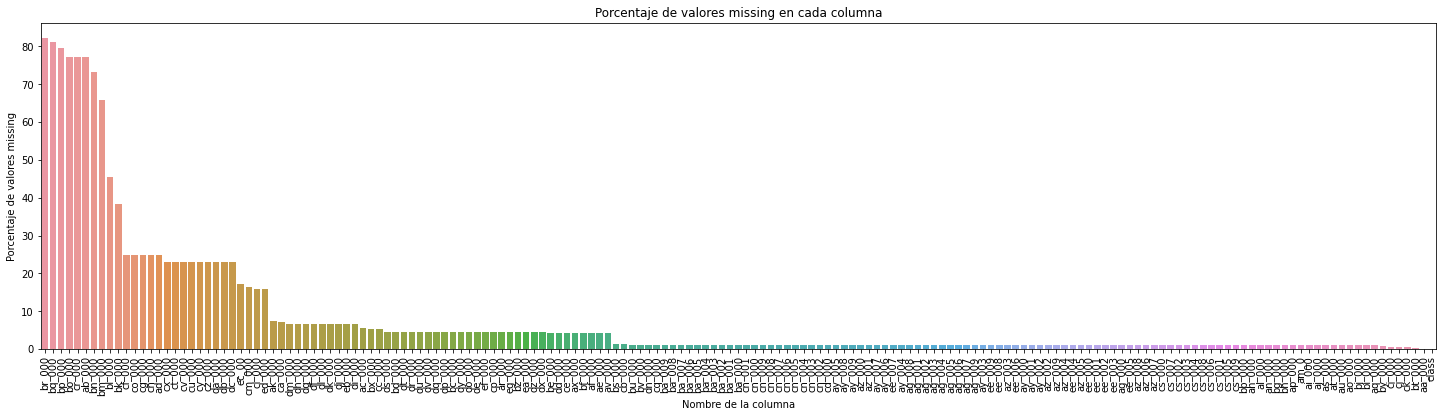

In [ ]:
cols_miss_perc = (df_train.isnull().sum()*100/df_train.shape[0]).sort_values(ascending = False)
plt.figure(figsize=(25, 6))
sns.barplot(x=cols_miss_perc.index, y=cols_miss_perc)
plt.title('Porcentaje de valores missing en cada columna')
plt.xlabel('Nombre de la columna')
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de valores missing')
plt.show()

- Como se observa en el gráfico, la mayoría de las características tienen menos de un 5% de valores *missing*. Sin embargo, también hay algunas que tienen más de un 70% de valores *missing*.

Se concluye de los puntos anteriores que hay una gran cantidad de valores *missing*, por lo que podría ser interesante ver si el número de valores *missing* tiene alguna relación con la clase; es decir, ¿tiene una clase más valores missing que la otra?


Boxplot para el número de valores *missing* en cada columna:

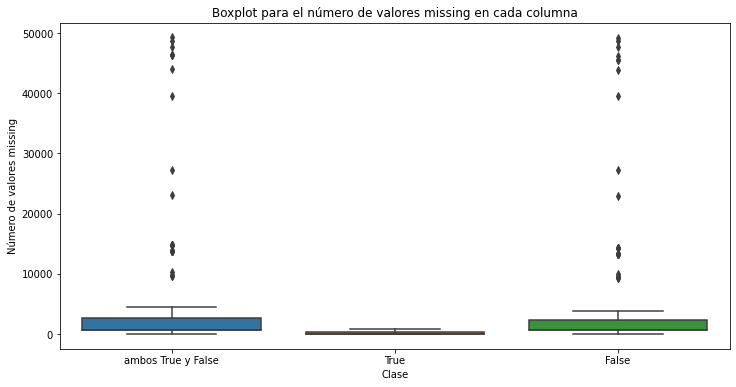

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = [df_train.isnull().sum(),df_train[df_train['class']==True].isnull().sum(),
                    df_train[df_train['class']==False].isnull().sum()])\
                    .set_xticklabels(['ambos True y False','True', 'False'])
plt.title('Boxplot para el número de valores missing en cada columna')
plt.xlabel('Clase')
plt.ylabel('Número de valores missing')
plt.show()

Boxplot para el número de valores *missing* en cada fila:

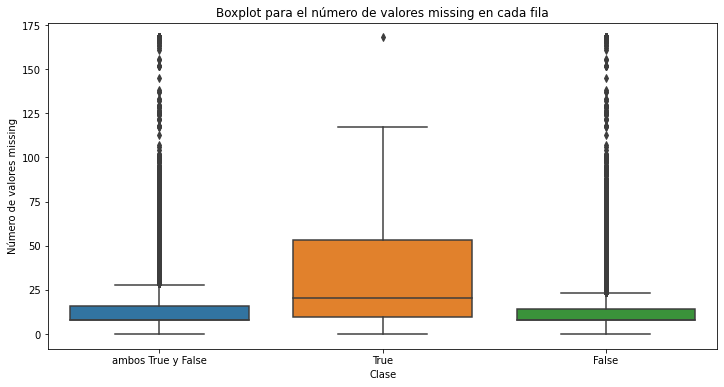

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = [df_train.isnull().sum(axis = 1),df_train[df_train['class']==True].isnull().sum(axis=1),
                    df_train[df_train['class']==False].isnull().sum(axis=1)])\
                    .set_xticklabels(['ambos True y False','True', 'False'])
plt.title('Boxplot para el número de valores missing en cada fila')
plt.xlabel('Clase')
plt.ylabel('Número de valores missing')
plt.show()

- La mayor parte de la distribución del número de valores *missing* (en cada columna) se encuentra entre 0 y 1000 y la mayor parte de la distribución del número de valores *missing* (en cada fila) se encuentra entre 0 y 25.
- La distribución del número de valores *missing* (en cada columna) de la clase “pos” se encuentra por debajo de la distribución de la clase “neg” (claramente está por debajo del percentil 25 de la clase negativa). En cambio, la distribución del número de valores *missing* (en cada fila) de la clase “pos” está por encima de la clase “neg”.

Además, también puede verse en los diagramas que hay una clara diferencia entre los rangos intercuantílicos de los puntos de datos de la clase positiva y de la negativa. Los puntos de datos de la clase positiva tienen un mayor número de valores *missing* en comparación con los de la clase negativa. Una posible explicación desde un punto de vista físico de esto podría ser que un problema en el APS podría comprometer otros sensores/sistemas de medición haciendo que se obtengan más valores ausentes para la observación. Un argumento que respalda esta hipótesis es el gran número de valores *missing* en el conjunto de datos. Como se ha visto antes, casi el 99% de las observaciones cuentan con valores ausentes.

PDF de los valores *missing*:

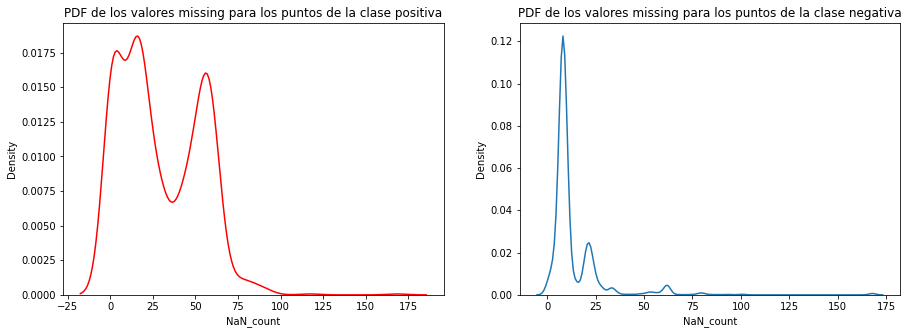

In [ ]:
# Dataframe que contiene la etiqueta de clase y el número de missings
labels = df_train['class'][na_count.index]
nan_df = pd.DataFrame({"class":labels, 'NaN_count':na_count})

# PDFs para ambas clases
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

# True
sns.kdeplot(x=nan_df[nan_df['class']==True]['NaN_count'], ax=ax[0], color='r')
ax[0].set_title("PDF de los valores missing para los puntos de la clase positiva")
# False
sns.kdeplot(x=nan_df[nan_df['class']==False]['NaN_count'], ax=ax[1])
ax[1].set_title("PDF de los valores missing para los puntos de la clase negativa")

plt.show()

También en las funciones de densidad de probabilidad se observa el mismo comportamiento que en los diagramas de cajas.

Gráfico de distribución de *missings* por característica:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


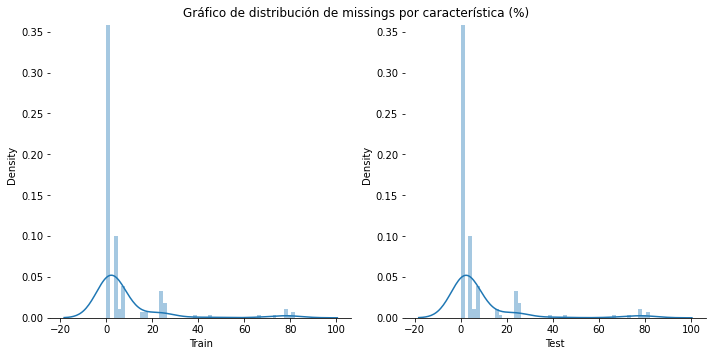

In [ ]:
feature_wise_NAs_train = (x_train.isna().sum(axis=0)/x_train.shape[0]*100)
feature_wise_NAs_test = (x_test.isna().sum(axis=0)/x_test.shape[0]*100)

fig, axes = plt.subplots(1, 2, figsize = (10,5))
sns.despine(left=True)

sns.distplot(feature_wise_NAs_train.values, ax=axes[0])
axes[0].set_xlabel("Train")

sns.distplot(feature_wise_NAs_test.values, ax=axes[1])
axes[1].set_xlabel("Test")

fig.suptitle("Gráfico de distribución de missings por característica (%)")

plt.tight_layout()
plt.show()

Un análisis fino de los valores de los cuantiles puede ser útil para determinar qué características eliminar si fuera necesario:

In [ ]:
# Valores cuantílicos para los missings del conjunto de datos de entrenamiento
for q in np.arange(0.1,1.1,0.1):
    print("Cuantil", int(q*100), ":", feature_wise_NAs_train.quantile(q))

print("\n- - - - - - - - - - - - - - - -\n")
    
for q in np.arange(0.9,1.01,0.01):
    print("Cuantil", int(q*100), ":", feature_wise_NAs_train.quantile(q))

Cuantil 10 : 1.0699999999999998
Cuantil 20 : 1.1183333333333334
Cuantil 30 : 1.1183333333333334
Cuantil 40 : 1.1183333333333334
Cuantil 50 : 1.1466666666666667
Cuantil 60 : 4.166666666666666
Cuantil 70 : 4.5405
Cuantil 80 : 6.68
Cuantil 90 : 23.013333333333335
Cuantil 100 : 82.10666666666665

- - - - - - - - - - - - - - - -

Cuantil 90 : 23.013333333333335
Cuantil 91 : 23.013333333333332
Cuantil 92 : 24.768333333333334
Cuantil 93 : 24.768333333333334
Cuantil 94 : 24.768333333333334
Cuantil 95 : 42.27941666666655
Cuantil 96 : 67.69900000000028
Cuantil 97 : 76.94433333333347
Cuantil 98 : 77.21913333333333
Cuantil 99 : 80.07403333333338
Cuantil 100 : 82.10666666666665


In [ ]:
# Valores cuantílicos para los missings del conjunto de datos de prueba
for q in np.arange(0.1,1.1,0.1):
    print("Cuantil", int(q*100), ":", feature_wise_NAs_test.quantile(q))

print("\n- - - - - - - - - - - - - - - -\n")
    
for q in np.arange(0.9,1.01,0.01):
    print("Cuantil", int(q*100), ":", feature_wise_NAs_test.quantile(q))

Cuantil 10 : 1.0562500000000001
Cuantil 20 : 1.18125
Cuantil 30 : 1.2
Cuantil 40 : 1.2
Cuantil 50 : 1.20625
Cuantil 60 : 4.3
Cuantil 70 : 4.775
Cuantil 80 : 6.8375
Cuantil 90 : 23.2375
Cuantil 100 : 82.05624999999999

- - - - - - - - - - - - - - - -

Cuantil 90 : 23.2375
Cuantil 91 : 23.237499999999997
Cuantil 92 : 24.881249999999998
Cuantil 93 : 24.881249999999998
Cuantil 94 : 24.881249999999998
Cuantil 95 : 41.97874999999988
Cuantil 96 : 67.66300000000027
Cuantil 97 : 76.98437500000014
Cuantil 98 : 77.319125
Cuantil 99 : 80.01000000000005
Cuantil 100 : 82.05624999999999


Tanto el gráfico de densidad como los cuantiles son necesarios para identificar el umbral superior del porcentaje de valores *missing* por característica. Este umbral es útil para descartar características si fuera necesario.

De este análisis, realizado sobre el conjunto de entrenamiento, se puede concluir que el 96% de las características tienen un porcentaje igual o menor al 67,70% de valores *missing* y el 99% de las características tienen un porcentaje igual o menor al 80% de valores *missing*.

También se puede concluir que si se eliminan las características con más de un 70% de valores missing, se tendrán más de un 96% de características aún disponibles; esto es, 163 características.

## Análisis Multivariante

Por último, se va a realizar un análisis multivariante utilizando todas las características del conjunto de datos para obtener algunas conclusiones. Para ello se representa mediante un mapa de calor la correlación de las características entre sí y con las columnas de clase.

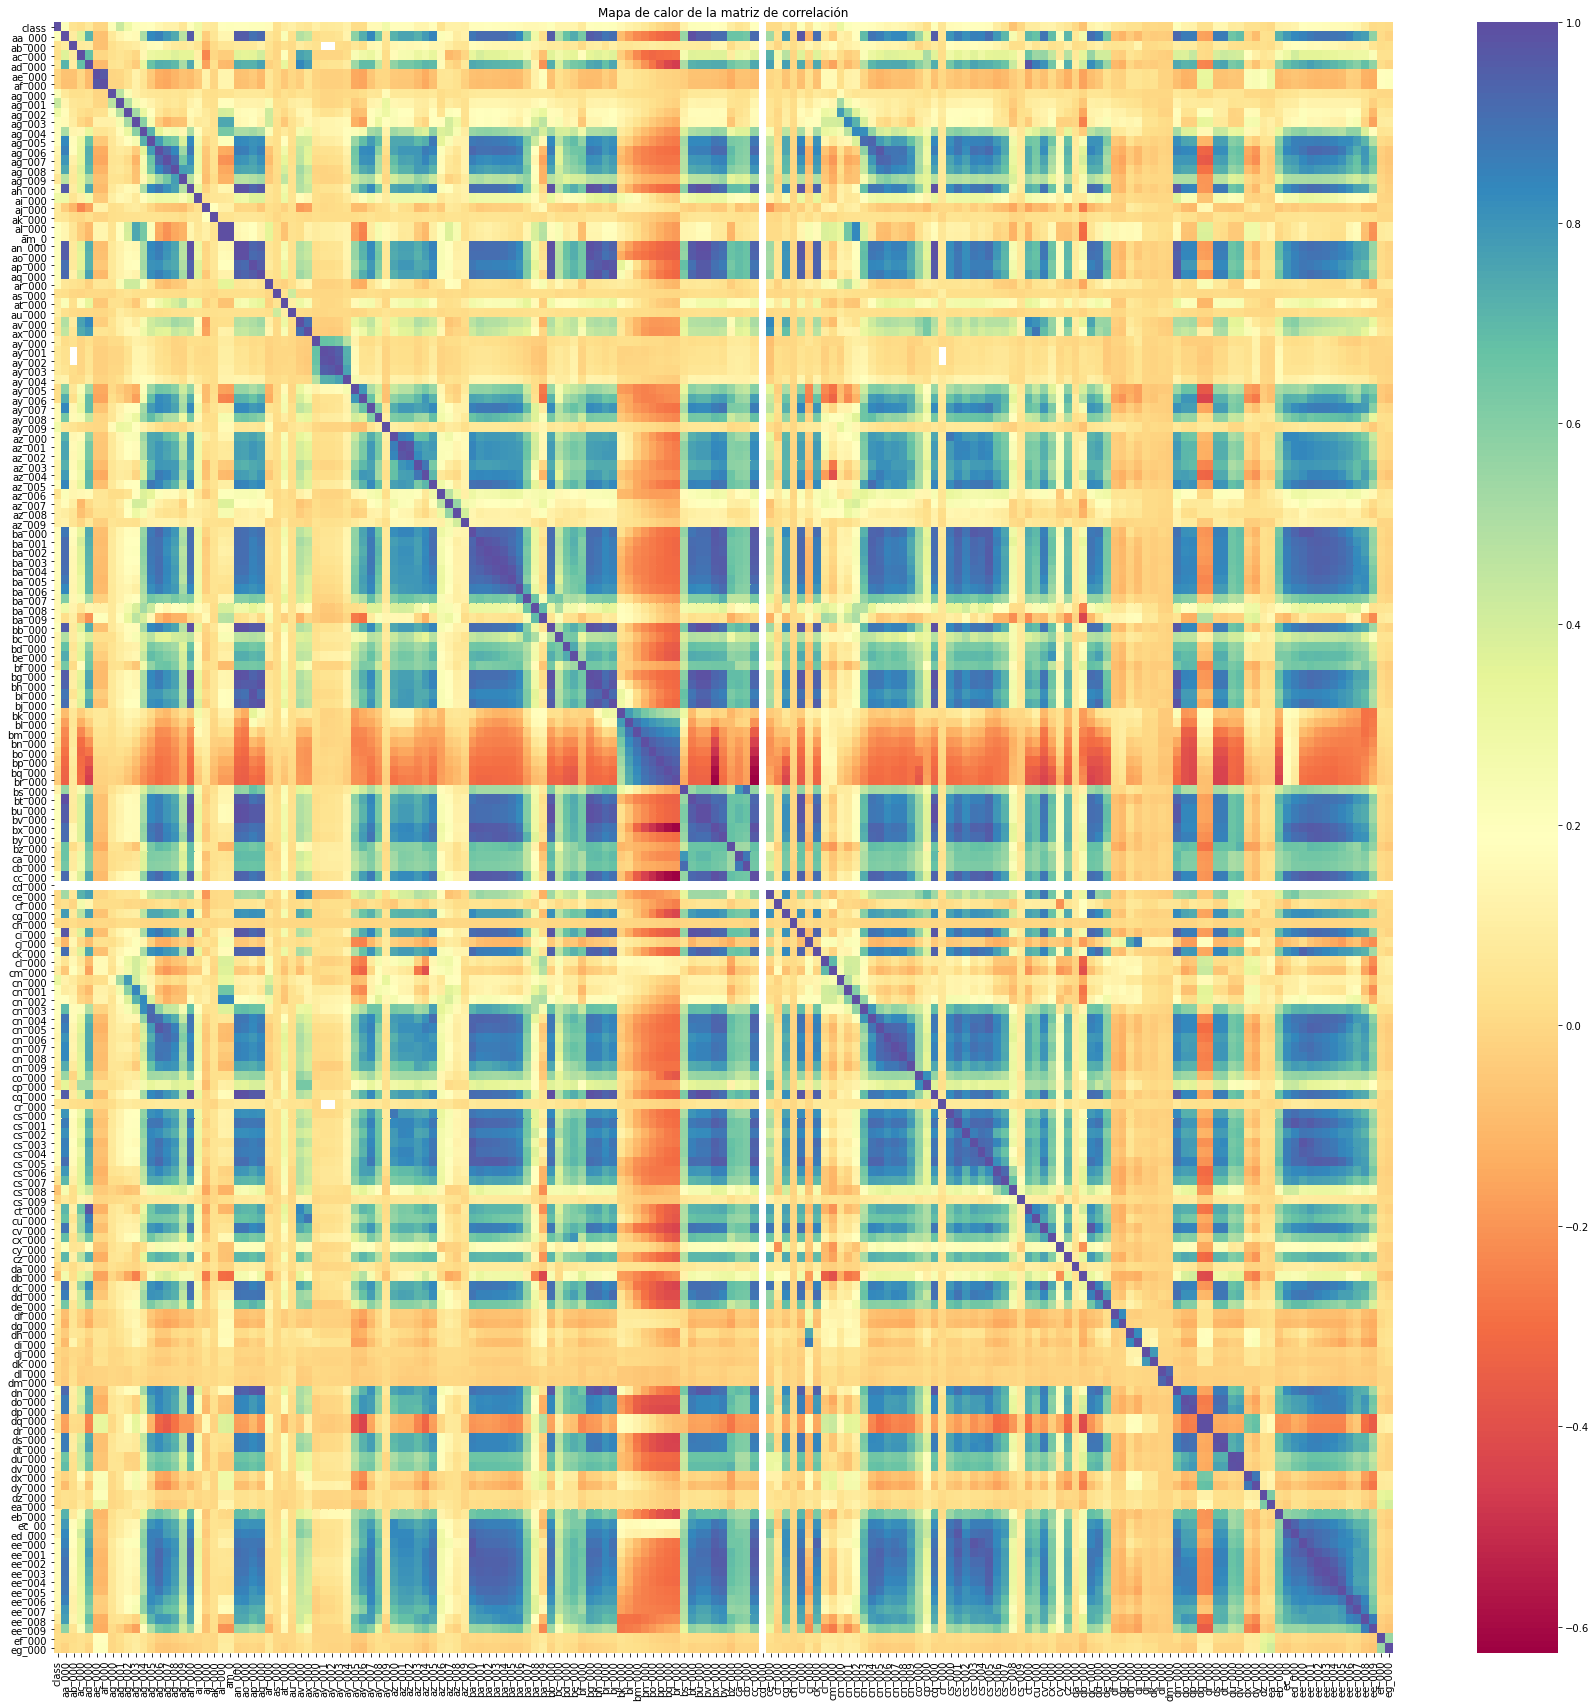

In [7]:
# Matriz de correlación para las características utilizando el coeficiente de correlación de Spearman
corr_matrix = df_train.corr(method='spearman')

# Representación del mapa de calor de la matriz de correlación
plt.figure(figsize=(30,30))
sns.heatmap(data = corr_matrix, xticklabels=df_train.columns, yticklabels=df_train.columns, cmap = 'Spectral')
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

- Casi toda la matriz tiene correlaciones positivas. Esto significa que para la clase positiva, los valores de las características serán en su mayoría mayores en comparación con las observaciones de la clase negativa.
- Hay algunas características que cuentan con un valor de correlación más alto que las demás. Sin embargo, para la mayoría de las características, la correlación está entre 0 y 0,25.
- Para la clase, las correlaciones son en su mayoría inferiores a 0,25. Sin embargo, algunas características tienen una mayor correlación con la clase, como se observa en las zonas de color más oscuro en la fila correspondiente a la columna de clase.
- Hay muchas columnas correladas.
- Algunos de los modelos de aprendizaje automático podrían no funcionar del todo bien debido a esto.

# 2. Creación de los conjuntos de datos

## **DS1**. Se imputan los valores *missing* como la mediana

Se entrena el modelo `SimpleImputer` con los datos de entrenamiento y se transforman los datos de entrenamiento y prueba con ese modelo.

In [ ]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median').fit(x_train)

x_train_med = pd.DataFrame(median_imputer.transform(x_train), columns = x_train.columns)
x_test_med = pd.DataFrame(median_imputer.transform(x_test), columns = x_test.columns)

Se podría guardar el modelo utilizando:

In [ ]:
# joblib.dump(median_imputer, 'median_imputer.pkl')

In [ ]:
x_train_med.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,0.0,1734472.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Se almacenan los nuevos datasets:

In [ ]:
# Conjuntos X
x_train_med.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS1_x_train.csv', index = False)
x_test_med.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS1_x_test.csv', index = False)

# Conjuntos y
y_train.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS1_y_train.csv', index = False)
y_test.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS1_y_test.csv', index = False)

## **DS2**. Se imputan los valores *missing* utilizando un `IterativeImputer`.

Además, se eliminan los registros con una gran cantidad de valores *missing*.

In [ ]:
print("El porcentaje global de missings en el conjunto de entrenamiento antes de la eliminación de características es", 
     round((df_train.isna().values.sum((0,1))/ df_train.size*100), 4), "%")

El porcentaje global de missings en el conjunto de entrenamiento antes de la eliminación de características es 8.2847 %


### **1**. Se eliminan las características con valor constante

Se eliminan las características con desviación estándar 0, ya que no aportan demasiada información al modelo.

In [ ]:
constant_value_features = []
info = df_train.describe()
for c in df_train.drop('class', axis=1).columns:
  if info[c]['std']==0:
    constant_value_features.append(c)
  
constant_value_features

['cd_000']

In [ ]:
# Para el conjunto train
df_train_DS2 = df_train.drop(constant_value_features, axis=1)
# Para el conjunto test
df_test_DS2 = df_test.drop(constant_value_features, axis=1)

print(df_train_DS2.shape, ' ', df_test_DS2.shape)

(60000, 170)   (16000, 170)


### **2**. Se eliminan las columnas que más porcentaje de valores *missing* tienen

En primer lugar, se eliminan las columnas con más de un 70% de valores *NA*.

El 30% de 60000 es
$$
60000 \cdot 0.3 = 18000
$$

Por lo que se conservarán las columnas que contengan por lo menos 18000 valores distintos a *NA*.

In [ ]:
df_train_DS2 = df_train_DS2.dropna(axis=1, thresh=18000)
df_train_DS2.shape

(60000, 163)

Las columnas eliminadas son:

In [ ]:
# Creación de un diccionario cuyas claves son los nombres de las columnas y los valores son el porcentaje de valores missing
nan_count = {k:list(df_train.isna().sum()*100/df_train.shape[0])[i] for i,k in enumerate(df_train.columns)}
# Se ordena el diccionario de manera descendente según el porcentaje de valores missing
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
na_70 = list(nan_count.keys())[:7]
na_70

['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000']

Se eliminan también del conjunto test:

In [ ]:
df_test_DS2 = df_test_DS2.drop(na_70, axis=1)
df_test_DS2.shape

(16000, 163)

In [ ]:
print("El porcentaje global de missings en el conjunto de entrenamiento después de la eliminación de características es", 
     round((df_test_DS2.isna().values.sum((0,1))/ df_test_DS2.size*100), 4), "%")

El porcentaje global de missings en el conjunto de entrenamiento después de la eliminación de características es 5.4007 %


### **3**. Se eliminan las filas que contengan valores *missing* en las columnas que cuentan con menos de un 5% de valores *missing*

De esta manera, esas características ya no tendrán ningún valor *NA*.

In [ ]:
# Columnas que contienen menos de un 5% de valores NA
na_5 = [k for k,v in nan_count.items() if v < 5 and k != 'cd_000']
len(na_5)

128

Y se eliminan las filas que tienen valor *NA* en alguna de las columnas de la lista creada anteriormente:

In [ ]:
df_train_DS2 = df_train_DS2.dropna(subset=na_5)
df_train_DS2.shape

(55973, 163)

Por último se resetean los valores del `Index` del `DataFrame`:

In [ ]:
df_train_DS2 = df_train_DS2.reset_index(drop=True)
df_train_DS2

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,False,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,False,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,False,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,False,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55968,False,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,1603216.0,6015982.0,1968266.0,164972.0,12560.0,4880368.0,0.0,280.0,0.0,1224.0,2114.0,8913782.0,7998174.0,1929126.0,776370.0,2.0,0.0,0.0,0.0,3328.0,1080.0,0.0,0.0,0.0,0.0,0.0,45114.0,2533260.0,2542338.0,...,0.0,1872932.0,4936.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62846.0,137050.0,27546.0,0.0,0.0,265640.0,54496.0,470800.0,293652.0,0.0,0.0,0.0,0.0,80125300.0,2912.04,2858.0,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
55969,False,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,99186.0,36564.0

Es necesario resetear los índices porque las puntuaciones de `sklearn.metrics` (como por ejemplo `precision_score`) se basan en los índices de los conjuntos de entrada para hacer los cálculos.

### **4**. Se separa la variable *target* del conjunto tras la eliminación de las filas/columnas *NA*

In [ ]:
# Para el conjunto train
x_train_DS2 = df_train_DS2.drop('class', axis=1)
y_train_DS2 = df_train_DS2['class']

print(x_train_DS2.shape, ' ', y_train_DS2.shape)

(55973, 162)   (55973,)


In [ ]:
# Para el conjunto test
x_test_DS2 = df_test_DS2.drop('class', axis=1)
y_test_DS2 = df_test_DS2['class']

print(x_test_DS2.shape, ' ', y_test_DS2.shape)

(16000, 162)   (16000,)


### **5**. Se imputan los valores *NA* restantes utilizando un `IterativeImputer`

In [ ]:
# Se entrena el modelo con los datos
# Por defecto, estimator = BayesianRidge()
iterative_imputer = IterativeImputer(missing_values = np.nan, random_state=0).fit(x_train_DS2)

# Se guarda el modelo
joblib.dump(iterative_imputer, '/content/drive/Shareddrives/TFM-JRA/data/iterative_imputer_DS2.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


['/content/drive/Shareddrives/TFM-JRA/data/iterative_imputer_DS2.pkl']

Se transforman los datos de entrenamiento y prueba con el modelo generado.

In [ ]:
x_train_it = pd.DataFrame(iterative_imputer.transform(x_train_DS2), columns = x_train_DS2.columns)
x_test_it = pd.DataFrame(iterative_imputer.transform(x_test_DS2), columns = x_test_DS2.columns)

In [ ]:
x_train_it.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,...,18.000000,5.330690e+06,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000e+00,195145.289648,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,...,12.983353,2.527496e+06,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,...,0.000000,2.341048e+06,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,5596.0,...,0.000000,2.578000e+03,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,584074.0,...,0.000000,3.590004e+06,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Se almacenan los nuevos datasets:

In [ ]:
# Conjuntos X
x_train_it.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS2_x_train.csv', index = False)
x_test_it.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS2_x_test.csv', index = False)

# Conjuntos y
y_train_DS2.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS2_y_train.csv', index = False)
y_test_DS2.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS2_y_test.csv', index = False)

## **DS3**. Aplicación de una técnica de sobremuestreo

En primer lugar se cargan los datos de entrenamiento de la sección anterior:

In [ ]:
DS2 = ['/content/drive/Shareddrives/TFM-JRA/data/DS/DS2_x_train.csv',\
       '/content/drive/Shareddrives/TFM-JRA/data/DS/DS2_y_train.csv']

x_train_it = pd.read_csv(DS2[0])
y_train_DS2 = pd.read_csv(DS2[1])

### **1**. Detección de *outliers* utilizando LOF (Local Outlier Factor)

In [ ]:
# Se eligen solo los registros pertenecientes a la clase positiva
df_train_DS3 = pd.concat([y_train_DS2, x_train_it], axis=1)

pos_df_train_DS3 = df_train_DS3[df_train_DS3["class"] == True]
neg_df_train_DS3 = df_train_DS3[df_train_DS3["class"] == False]

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, n_jobs=4)
# 1: inlier; -1: outlier
out = lof.fit_predict(pos_df_train_DS3)
print("Número de outliers: ", (out == -1).sum())

Número de outliers:  65


Se eliminan los *outliers* de la clase positiva y se concatenan con los datos de la clase negativa:

In [ ]:
# También se resetea el Index
df_train_DS3_no_outlier = pd.concat([neg_df_train_DS3, pos_df_train_DS3[out == 1]]).sort_index().reset_index(drop=True)
df_train_DS3_no_outlier.shape

(55908, 163)

### **2**. Se aplica *oversampling* utilizando ADASYN

Primero se dividen los datos entre *X* e *y*:

In [ ]:
x_train_DS3 = df_train_DS3_no_outlier.drop('class', axis=1)
y_train_DS3 = df_train_DS3_no_outlier['class']

print(x_train_DS3.shape, ' ', y_train_DS3.shape)

(55908, 162)   (55908,)


Se inicializa el objeto `ADASYN` y se entrena con los datos anteriores:

In [ ]:
# Se utiliza un ratio de 0.5 entre la clase minoritaria y la mayoritaria
ada = ADASYN(sampling_strategy=0.5, random_state=0, n_neighbors=5, n_jobs=4)
x_train_DS3_ada, y_train_DS3_ada = ada.fit_resample(x_train_DS3, y_train_DS3)

print(x_train_DS3_ada.shape, ' ', y_train_DS3_ada.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(83059, 162)   (83059,)


Se representa el impacto del *oversampling*:

In [ ]:
# A DataFrame
x_train_DS3_ada = pd.DataFrame(x_train_DS3_ada, columns=x_train_DS3.columns)
y_train_DS3_ada = pd.DataFrame(y_train_DS3_ada, columns=['class'])

df_train_DS3_ada = pd.concat([y_train_DS3_ada, x_train_DS3_ada], axis=1)
df_train_DS3_ada.shape

(83059, 163)

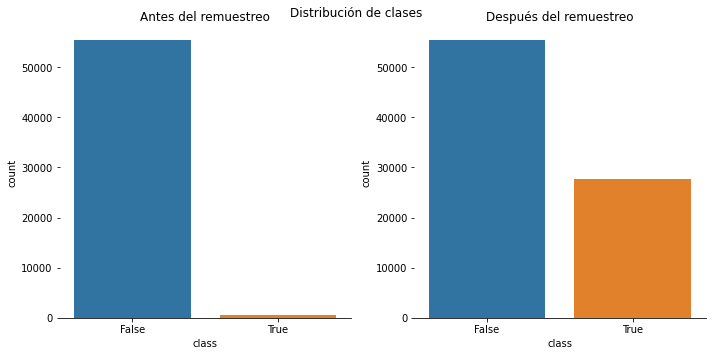

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
sns.despine(left=True)

sns.countplot(x=df_train_DS3_no_outlier["class"], ax=axes[0])
axes[0].set_title("Antes del remuestreo")

sns.countplot(x=df_train_DS3_ada["class"] , ax=axes[1])
axes[1].set_title("Después del remuestreo")

fig.suptitle("Distribución de clases")
plt.tight_layout()
plt.show()

Se almacenan los nuevos datasets:

In [ ]:
# Solo se han modificado los conjuntos de train
x_train_DS3_ada.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS3_x_train.csv', index = False)
y_train_DS3_ada.to_csv('/content/drive/Shareddrives/TFM-JRA/data/DS/DS3_y_train.csv', index = False)